In [112]:
from pandas import DataFrame, read_csv

import matplotlib.pyplot as plt
import pandas as pd
import sys
import matplotlib

# Enable inline plotting
%matplotlib inline

In [113]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.5 (v3.6.5:f59c0932b4, Mar 28 2018, 03:03:55) 
[GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]
Pandas version 0.23.0
Matplotlib version 2.2.2


In [114]:
files_dir = '../../../leeuwarden_data/';
sensors_file = files_dir + 'locatus/gps_locaties_sensors.csv'
locatus_file = files_dir + 'locatus/locatusdata_bewerkt.csv';

In [115]:
sens = read_csv(sensors_file, delimiter=';', decimal=',')

In [116]:
sensors = pd.DataFrame(sens, columns = ['sensor_id', 'latitude', 'longitude'])
sensors

,sensor_id,latitude,longitude
0,1074,5.794506,53.200509
1,1078,5.793081,53.200826
2,1079,5.797128,53.200347
3,1625,5.792219,53.199183
4,1627,5.793139,53.200104
5,1631,5.791639,53.202216
6,1636,5.796556,53.201777
7,2054,5.795879,53.199645
8,2779,5.799048,53.202032


In [128]:
# Read rows in chunks
locatus_chunks = 10 ** 6

locatus_reader = pd.read_csv(locatus_file , chunksize = locatus_chunks
                             , delimiter = ';', decimal = ',', header = 0, index_col = 0)

for chunk in locatus_reader:
    print("Data types:")
    print(chunk.dtypes)
    
    print(chunk)
    break

Data types:
VirtualSensorCode     int64
DateTimeLocal        object
Duration             object
code_address          int64
dtype: object
        VirtualSensorCode        DateTimeLocal Duration  code_address
id                                                                   
0                    2054  2017-08-04 15:29:58      NaN        119254
1                    2054  2017-08-04 13:57:42      NaN         43074
2                    2054  2016-09-20 17:47:05      0.0          4840
3                    2054  2017-08-17 14:20:43      0.0        991988
4                    2054  2017-08-17 17:43:27      0.0        992009
5                    2054  2017-08-17 14:50:27      NaN        993071
6                    2054  2017-08-17 13:27:00    646.0        994771
7                    2054  2017-08-17 13:00:23      0.0       1072898
8                    2054  2017-08-17 13:41:31      NaN       1088219
9                    2054  2017-08-17 12:27:34      0.0       1089129
10                   2

In [157]:
# Try to count occurrences for all devices over all series
from collections import Counter

series = []

idx=0
for chunk in locatus_reader:
    print(idx)
    idx = idx + 1
    serie = chunk['code_address'].value_counts()
    break
    # What comes next?
    # https://pandas.pydata.org/pandas-docs/stable/merging.html
    # https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options
    series = dict(Counter(series)+Counter(serie))

# For next slide we hope to have series in order
series = serie

print('code_address', 'count')
print (series)
print(type(series))


# ?pd.read_csv

code_address count
1368474    3580
159232     2508
55808      1555
1370351    1315
1343663    1092
1100244    1043
1247191    1015
1572224     963
553544      950
532184      925
898968      919
771431      897
1000354     824
24752       807
354556      781
1662992     758
1538815     752
1220277     724
461635      711
1353034     682
235003      677
335783      659
1534192     653
54918       636
39802       635
877858      632
317223      567
826278      564
106727      505
379779      505
           ... 
1359629       1
804626        1
491125        1
501358        1
1572453       1
1033826       1
865226        1
736765        1
421411        1
312834        1
849412        1
820746        1
1332752       1
1384678       1
267800        1
263706        1
390692        1
374316        1
345650        1
38364         1
967504        1
972352        1
1498689       1
968258        1
980548        1
63980         1
419414        1
1503522       1
925273        1
1572864       1
Name:

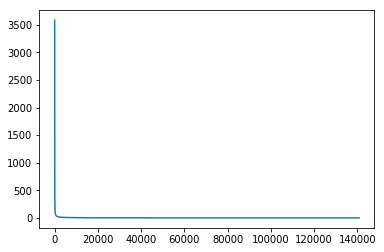

In [158]:
series.plot(use_index = False)

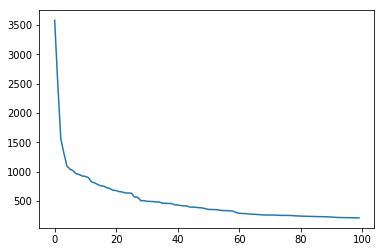

In [159]:
first_n = series.head(100)
first_n.plot(use_index = False)

In [149]:
series.head()

AttributeError: 'list' object has no attribute 'head'